In [1]:
import cv2
import os
import numpy as np

In [2]:
dirname = 'lfwcrop_color/faces/'
filenames = os.listdir(dirname)

In [8]:
def load_imgs(dirname, filenames):
    imgs = []
    for fname in filenames:
        im = cv2.imread(dirname + fname)
        im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im = np.reshape(im, 64 * 64)
        
        imgs.append(im)
    imgs = np.stack(imgs, axis = 0)
    return imgs

In [56]:
from sklearn.cross_validation import train_test_split
from random import shuffle

shuffle(filenames)
target_names = [' '.join(f.split('_')[:-1]) for f in filenames]

class Counting(object):
    n = 0
    def factory():
        Counting.n += 1
        return Counting.n
    factory = staticmethod(factory)

from collections import defaultdict
names_id = defaultdict(Counting.factory)

y = [names_id[t] for t in target_names] 

In [67]:
F_train, F_test, T_train, T_test = train_test_split(filenames, y, test_size=0.2)
I_train = load_imgs(dirname, F_train)
I_test = load_imgs(dirname, F_test)

In [68]:
def center(faces):
    n_samples, n_features = faces.shape
    # Center the faces
    faces_centered = faces - faces.mean(axis=0)
    faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)
    return faces_centered

faces_centered = center(I_train)

# PCA

In [69]:
from sklearn.decomposition import PCA
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D   # 3D Plotting
from scipy import stats
import ipywidgets                         # interactions

%matplotlib inline

In [70]:
n_components = 6

In [71]:
from sklearn import decomposition

In [72]:
data = faces_centered
# We use a variant of PCA called Randomized PCA for efficiency. It uses stochastic SVD.
estimator = decomposition.RandomizedPCA(n_components=n_components, whiten=True)
estimator.fit(data)

RandomizedPCA(copy=True, iterated_power=3, n_components=6, random_state=None,
       whiten=True)

In [73]:
def plot_gallery(title, images, n_col=3, n_row=5):
    """
    Helper function to plot images.
    """
    image_shape = (64, 64)

    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks([])
        plt.yticks([])
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

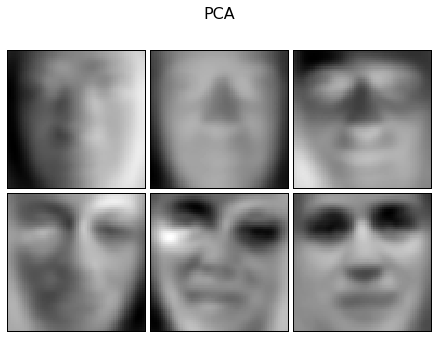

In [74]:
plot_gallery('PCA', estimator.components_[:n_components])

## Fit

In [75]:
I_train_pca = estimator.transform(faces_centered)
I_test_pca = estimator.transform(center(I_test))